In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from OpenFAST_IO import OpenFASTOutput, OpenFASTBinary
from OpenFAST_Processors import pyLife

from scipy.signal import find_peaks

In [19]:
fp = os.path.join(os.getcwd(), "tests", "data", f"IEA15MW_DLC_ED_{1:03d}.outb")
output = OpenFASTBinary(fp)
output.read()

In [32]:
test = pd.DataFrame([1, 2]).shape
test

(2, 1)

In [33]:
output.stddevs

array([[1.73207967e+02, 8.75634503e-01, 9.66204601e-01, 5.46358393e-01,
        1.03927249e+02, 1.63909384e+00, 3.54492614e-01, 1.04114887e+00,
        3.23201268e+03, 3.23066267e+03, 3.23201268e+03, 2.80445702e+03,
        3.23066267e+03, 2.34467593e+03, 3.34708437e+01, 2.10009544e+01,
        0.00000000e+00, 9.99993240e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.76746264e+01, 4.52621770e+02,
        4.49398489e+02, 1.21172450e+04, 1.20964139e+04, 1.20853447e+04,
        1.21426790e+04, 1.21269039e+04, 1.21120436e+04, 3.91828401e+03,
        3.92193991e+03, 3.88803340e+03, 3.82106204e+03, 3.81939206e+03,
        3.78993179e+03, 2.73605569e+01, 2.73272595e+01, 2.71386049e+01,
        3.54492614e-01, 1.35660587e+02, 5.56245123e+00, 3.93498223e+03,
        2.30405917e+03, 7.78715665e-02, 3.23573373e-02, 0.00000000e+00,
        1.01113798e+00, 1.01208241e+00, 1.00493020e+00, 9.99993240e-01,
        1.00039222e+00, 9.93772145e-01, 1.03110911e+00, 1.029243

In [25]:
output.minima[49]

0.22033482789993286

In [4]:
directory = os.path.join(os.getcwd(), "tests", "data")
life = pyLife(directory, fatigue_channels=['RootMzc1'])
life.read_files()

[37]
[[-75.64019775]
 [-75.77629089]
 [-73.0196991 ]
 ...
 [-72.64037323]
 [-78.41996002]
 [-80.05017853]]
[37]
[[-83.9695816 ]
 [-84.95915222]
 [-84.27848053]
 ...
 [-66.53177643]
 [-68.64486694]
 [-67.73184204]]
[37]
[[-131.69787598]
 [-134.80197144]
 [-131.7925415 ]
 ...
 [ -78.36513519]
 [ -76.27248383]
 [ -78.68650818]]
[37]
[[ -58.76085663]
 [ -58.39144897]
 [ -59.38050842]
 ...
 [-122.4467926 ]
 [-122.61601257]
 [-116.52196503]]
[37]
[[-48.08230209]
 [-47.52408981]
 [-46.44710922]
 ...
 [-68.20212555]
 [-71.62116241]
 [-69.23360443]]


In [5]:
def race_track(peaks, thresh):
    
    print(len(peaks))
    inds = []
    kept = []
    filtpeaks = np.zeros(len(peaks))
    
    s1 = peaks[0]
    s2 = peaks[1]

    ind = 1
    num_kept = 0
    
    while ind < len(peaks) - 1:

        ind += 1
        s3 = peaks[ind]
#         print(peaks)
        
        diff12 = abs(s1 - s2)
        diff23 = abs(s2 - s3)
        diff31 = abs(s3 - s1)
        
        if diff12 < thresh:
            
            if (diff23 >= diff12) and (diff23 >= diff31):
                
                s1 = s2
                s2 = s3
                
                if diff23 >= thresh:
                    break
                    
            elif (diff31 >= diff12) and (diff31 >= diff23):
                
                s2 = s3
                
                if diff31 >= thresh:
                    break
                    
        else:
            ind = ind - 1
            break

    
    print(len(kept))
    while ind < len(peaks) - 1:
        
        ind += 1
        s3 = peaks[ind]
        
        diff12 = abs(s1 - s2)
        diff23 = abs(s2 - s3)
        
        if diff23 >= thresh:
            
            num_kept += 1
            filtpeaks[num_kept - 1] = s1
            kept.append(s1)
            inds.append(ind - 1)
            
            s1 = s2
            s2 = s3
            
        else:
            
            ind += 1
            
            if ind > len(peaks) - 1:
                break
            
            s3 = peaks[ind]
            
            if abs(s1 - s3) > diff12:
                s2 = s3
 
    filtpeaks[num_kept] = s1
    kept.append(s1)
    inds.append(ind - 1)
    filtpeaks[num_kept + 1] = s2
    inds.append(ind)
    kept.append(s2)
    
    return filtpeaks[np.where(filtpeaks != 0)], inds, kept

In [6]:
peaks = life._peaks["IEA15MW_DLC_ED_001.outb"]["RootMzc1"]
peaks

array([[-83.9695816 ],
       [-84.95915222],
       [-82.39774323],
       ...,
       [-91.42417908],
       [-87.24720001],
       [-87.44675446]])

In [11]:
np.unique([0, 0, 1, 4, 5])

array([0, 1, 4, 5])

In [409]:
test = np.array([4, 4, 2, 1])

In [410]:
test

array([4, 4, 2, 1])

In [411]:
np.unique(test)

array([1, 2, 4])

In [149]:
output.filepath

'/Users/jnunemak/Desktop/repos/OpenFAST-post-processors/tests/data/IEA15MW_DLC_ED_001.outb'

In [14]:
data = output.data[:, 37]
print(data)

end = data[-1]
data = data[np.where((data[1:] - data[:-1] != 0))[0]]
print(data.shape)
data = np.append(data, end)
print(data.shape)

back = data[1:-1] - data[:-2]
forw = data[2:] - data[1:-1]
sign = np.sign(back) + np.sign(forw)
peakinds = np.unique([0, *np.where(sign == 0)[0] + 1, len(data) - 1])
# peaks = data[np.array([0, *peakinds, len(data) - 1])]
peaks = data[peakinds]

peaks

[-83.9695816  -84.95915222 -84.27848053 ... -66.53177643 -68.64486694
 -67.73184204]
(59985,)
(59986,)


array([-83.9695816 , -84.95915222, -77.5100174 , ..., -65.62967682,
       -68.64486694, -67.73184204])

In [16]:
peaks

array([-83.9695816 , -84.95915222, -77.5100174 , ..., -65.62967682,
       -68.64486694, -67.73184204])

In [17]:
peaks.shape

(30805,)

In [18]:
threshold = 20
newmax, _ = find_peaks(peaks, prominence=0)
newmin, _ = find_peaks(-peaks, prominence=0)
newinds = np.array([0, *np.sort(np.append(newmax, newmin)), len(peaks)-1])
newinds.shape

(30805,)

In [27]:
newinds

array([    0,     1,     2, ..., 30800, 30801, 30802])

In [31]:
data.shape

(59986,)

(59500.0, 60000.0)

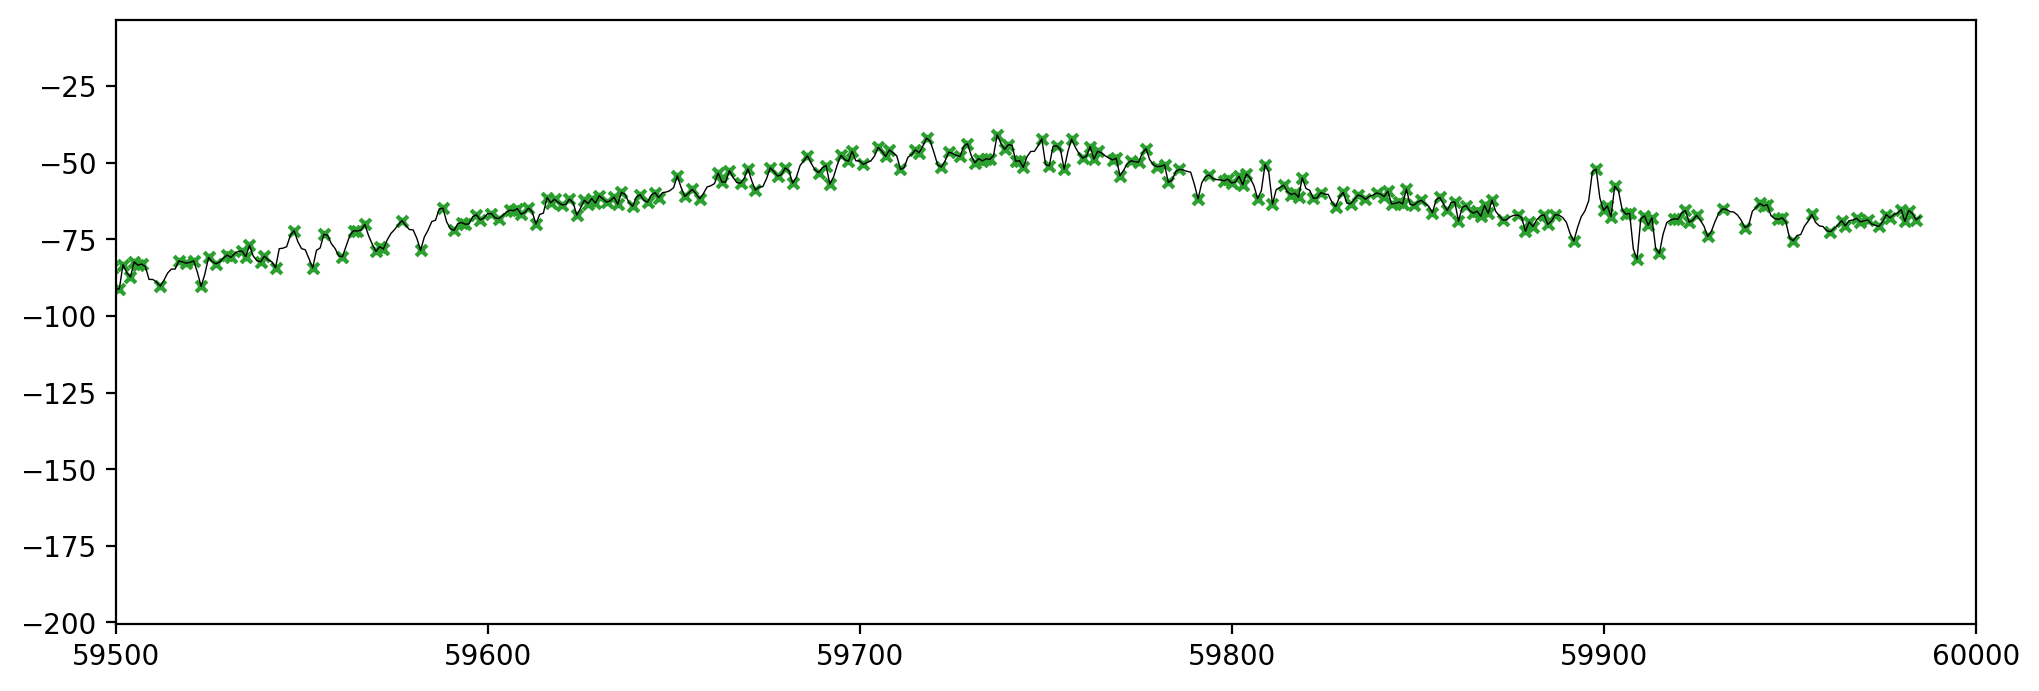

In [38]:
fig = plt.figure(figsize=(12,4), dpi=200)
ax = fig.add_subplot(111)

ax.plot(data, lw=0.5, c='k')
ax.scatter(x=peakinds, y=peaks, c='tab:blue', s=3)
ax.scatter(x=peakinds[newinds], y=peaks[newinds], c='tab:green', s=15, marker='x')
# ax.scatter(x=[i-2 for i in oldinds], y=[data[i-1] for i in oldinds], c='tab:red', s=15, marker='x')

ax.set_xlim(59500, 60000)
# ax.set_ylim(-75, -50)

In [320]:
peakinds[newinds]

array([  521,   525,   533,   537,   542,   546,   550,   691,   694,
        1598,  1627,  1634,  1783,  1790,  1793,  1795,  2701,  2708,
        2716,  2720,  2732,  2735,  2739,  2744,  2872,  2876,  2914,
        2917,  3799,  3802,  3807,  3812,  4142,  4148,  4743,  4857,
        4917,  4950,  4971,  5137,  5178,  5180,  5184,  5634,  6003,
        6005,  6060,  6079,  6109,  6114,  6298,  6491,  6513,  7227,
        7237,  7256,  7267,  7273,  7277,  7517,  7843,  7889,  8295,
        8441,  8611,  8638,  8669,  8672,  8695,  8704,  8764,  8768,
        8772,  8777,  9117,  9148,  9355,  9461,  9484,  9495,  9497,
        9507,  9508,  9510,  9513,  9515,  9516,  9517,  9519,  9521,
        9522,  9534,  9538,  9561,  9563,  9605,  9689,  9693,  9853,
       10098, 10400, 10800, 10808, 10844, 10909, 10921, 10925, 10933,
       10938, 10953, 10957, 10968, 10972, 10980, 10983, 10986, 10989,
       10997, 11002, 11006, 11248, 12315, 12319, 12584, 13302, 13315,
       13648, 13658,

In [318]:
new

[180,
 193,
 206,
 507,
 514,
 521,
 524,
 525,
 528,
 537,
 542,
 553,
 624,
 729,
 1284,
 1599,
 1606,
 1617,
 1626,
 1631,
 1638,
 1783,
 1786,
 1795,
 1798,
 1847,
 2386,
 2633,
 2646,
 2677,
 2680,
 2689,
 2700,
 2705,
 2710,
 2719,
 2726,
 2739,
 2742,
 2747,
 2758,
 2867,
 2876,
 2879,
 2914,
 2917,
 2920,
 2947,
 3526,
 3769,
 3786,
 3803,
 3806,
 3811,
 3822,
 3827,
 3832,
 3851,
 3854,
 3881,
 3926,
 3973,
 4148,
 4151,
 4626,
 4857,
 4860,
 4917,
 4920,
 4945,
 4954,
 4969,
 4974,
 5133,
 5180,
 5183,
 5186,
 5197,
 5364,
 5385,
 5636,
 5649,
 5718,
 5751,
 5814,
 6005,
 6010,
 6051,
 6058,
 6065,
 6070,
 6079,
 6082,
 6109,
 6112,
 6117,
 6216,
 6297,
 6486,
 6491,
 6494,
 6501,
 6516,
 6549,
 6718,
 7225,
 7230,
 7237,
 7240,
 7259,
 7272,
 7277,
 7282,
 7425,
 7522,
 7537,
 7846,
 7879,
 8018,
 8295,
 8296,
 8393,
 8400,
 8415,
 8424,
 8441,
 8444,
 8451,
 8462,
 8467,
 8514,
 8529,
 8598,
 8613,
 8628,
 8637,
 8668,
 8671,
 8674,
 8677,
 8696,
 8737,
 8768,
 8773,
 8776,

(-75.0, -50.0)

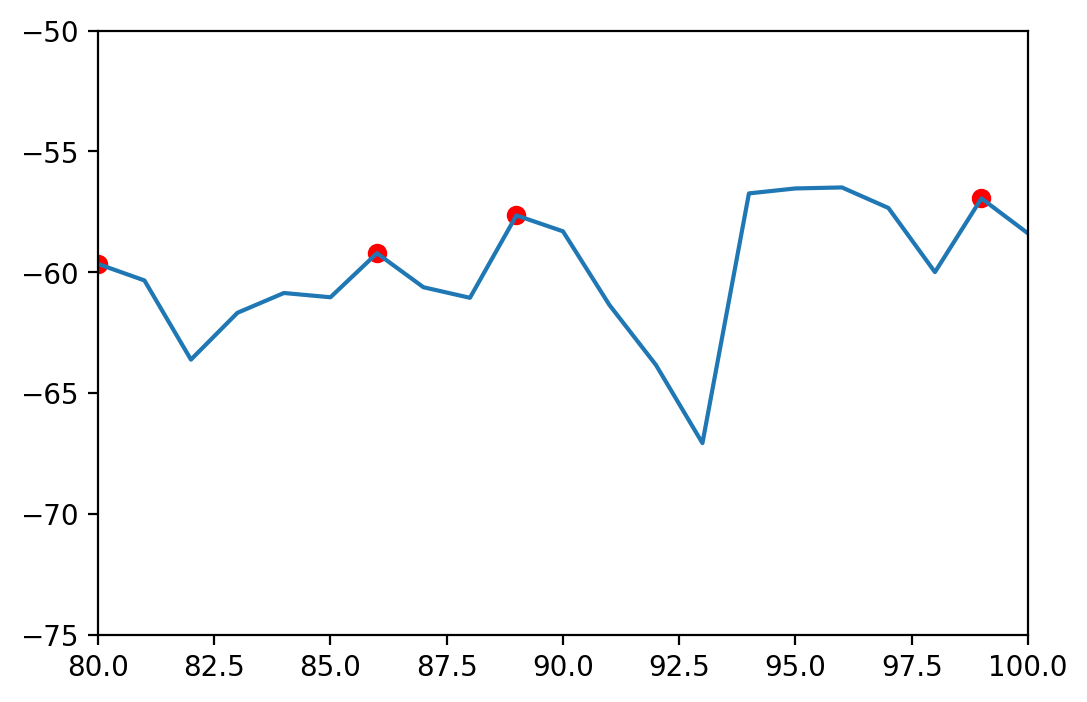

In [171]:
fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.add_subplot(111)

ax.plot(data)
ax.scatter(x=scipeaks, y=[output.data[i, 37] for i in list(scipeaks)], c='r')

ax.set_xlim(80, 100)
ax.set_ylim(-75, -50)

In [159]:
filtpeaks = race_track(peaks, 6)
filtpeaks.shape

jump out at 23


(10680,)

In [160]:
locs = np.isin(peaks, filtpeaks)
locs.shape

(30805,)

In [161]:
filtinds = peakinds[np.where(locs)]
filtinds.shape

filtered = peaks[np.where(locs)]
filtered

array([-84.95915222, -77.5100174 , -74.98141479, ..., -72.50475311,
       -68.9209671 , -65.32624817])

(-75.0, -50.0)

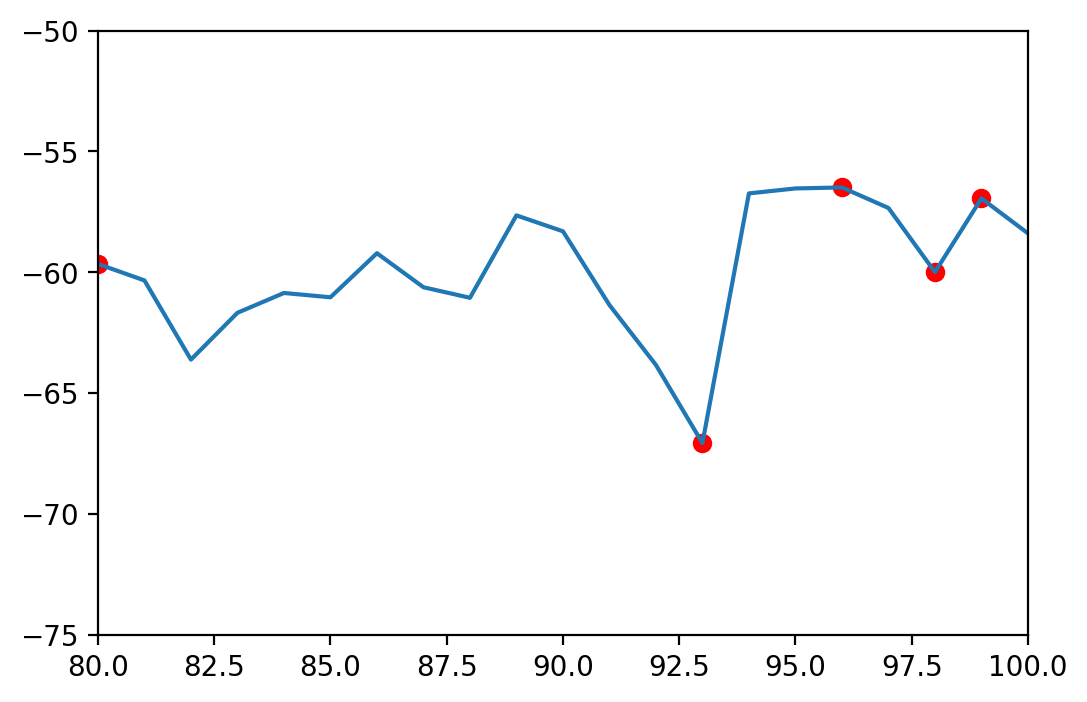

In [162]:
fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.add_subplot(111)

ax.plot(data)
ax.scatter(x=filtinds, y=[data[i] for i in list(filtinds)], c='r')

ax.set_xlim(80, 100)
ax.set_ylim(-75, -50)

In [114]:
filtinds

array([    5,    72,    99, ..., 59911, 59943, 59965])

In [ ]:
function FiltPeaks = race_track_filter( Peaks, Thresh )
      % Use the racetrack-filter algorithm to eliminate small cycles from the list of peaks .


      % Initialize the algorithm.

      NumPeaks  = size (    Peaks, 1 );
      FiltPeaks = zeros( NumPeaks, 1 );

      S1 = Peaks(1);
      S2 = Peaks(2);

      Ind     = 2;
      NumKept = 0;

      while ( Ind < NumPeaks )

         Ind = Ind + 1;
         S3  = Peaks(Ind);


         % Calculate the absolute difference between data points.

         Diff12 = abs( S1 - S2 );
         Diff23 = abs( S2 - S3 );
         Diff31 = abs( S3 - S1 );


         % Must find the greatest difference.  If difference is greater then the threshold
         % value, continue with the algorithm; otherwise go back and get another data point.

         if ( Diff12 < Thresh )


            % See if Diff23 is greatest.

            if ( ( Diff23 >= Diff12 ) && ( Diff23 >= Diff31 ) )

               S1 = S2;
               S2 = S3;

               if ( Diff23 >= Thresh ), break, end                % Jump out of this while loop.


               % See if Diff31 is greatest.

            elseif ( ( Diff31 >= Diff12 ) && ( Diff31 >= Diff23 ) )

               S2 = S3;

               if ( Diff31 >= Thresh ), break, end                % Jump out of this while loop.

            end% if

         else

            Ind = Ind - 1;                                        % We don't really want to get another data point just yet, so trick it.

            break                                                 % Jump out of this while loop.

         end % if ( Diff12 < Thresh )

      end % while ( Ind < NumPeaks )


      % If Diff32 is greater then the threshold, write s1 to output file
      % and move s1, s2, and s3 forward in the data file by one.
      % If Diff32 is less than the threshold, points must be discarded.

      while ( Ind < NumPeaks )

         Ind = Ind + 1;
         S3  = Peaks(Ind);

         Diff12 = abs( S1 - S2 );
         Diff23 = abs( S2 - S3 );

         if ( Diff23 >= Thresh )

            NumKept = NumKept + 1;

            FiltPeaks(NumKept) = S1;

            S1 = S2;
            S2 = S3;

         else

            Ind = Ind + 1;

            if ( Ind > NumPeaks ), break, end                     % Jump out of this while loop.

            S3 = Peaks(Ind);

            if ( abs( S1 - S3 ) > Diff12 ), S2 = S3; end

         end % if ( Diff23 >= Thresh )

      end % while  ( Ind < NumPeaks )

      FiltPeaks(NumKept+1) = S1;
      FiltPeaks(NumKept+2) = S2;


      % Eliminate the unused elements.

      FiltPeaks(NumKept+3:NumPeaks) = [];

   end % function FiltPeaks = RTfilt( Peaks, Thresh )